단순선형회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2021-12-01', '2022-01-21')

stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2021-12-01  71868.906250  2899.719971   74400.0  2899.719971   74800.0   
2021-12-02  73221.281250  2945.270020   75800.0  2945.270020   75800.0   
2021-12-03  73028.093750  2968.330078   75600.0  2968.330078   76000.0   
2021-12-06  73704.281250  2973.250000   76300.0  2973.250000   76700.0   
2021-12-07  74766.859375  2991.719971   77400.0  2991.719971   77700.0   
2021-12-08  74766.859375  3001.800049   77400.0  3001.800049   78600.0   
2021-12-09  75539.648438  3029.570068   78200.0  3029.570068   78200.0   
2021-12-10  74283.867188  3010.229980   76900.0  3010.229980   77600.0   
2021-12-13  74187.273438  3001.659912   76800.0  3001.659912   78300.0   
2021-12-14  74380.468750  2987.949951   77000.0  2987.949951   77200.0   
2021-12-15  74960.062500  2989.389893   77600.0  2989.389893   77600.0   
2021-12-16  75153.257812  3006.409912   77800.0  3006.409912   78500.0   
2021-12-17  75346.445312  3017.729980   78000.0  3017.729980   78000.0   
2021-12-20  74477.054688  2963.000000   77100.0  2963.000000   77800.0   
2021-12-21  75443.046875  2975.030029   78100.0  2975.030029   78300.0   
2021-12-22  76698.820312  2984.479980   79400.0  2984.479980   79400.0   
2021-12-23  77181.804688  2998.169922   79900.0  2998.169922   80000.0   
2021-12-24  77761.382812  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77471.609375  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  77568.203125  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76462.968750  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  75977.804688  2977.649902   78300.0  2977.649902   79500.0   
2022-01-04  76365.953125  2989.239990   78700.0  2989.239990   79200.0   
2022-01-05  75104.492188  2953.969971   77400.0  2953.969971   79000.0   
2022-01-06  74619.320312  2920.530029   76900.0  2920.530029   77600.0   
2022-01-07  75977.804688  2954.889893   78300.0  2954.889893   78400.0   
2022-01-10  75686.703125  2926.719971   78000.0  2926.719971   78100.0   
2022-01-11  76560.015625  2927.379883   78900.0  2927.379883   79000.0   
2022-01-12  76560.015625  2972.479980   78900.0  2972.479980   79600.0   
2022-01-13  75589.671875  2962.090088   77900.0  2962.090088   79300.0   
2022-01-14  75007.468750  2921.919922   77300.0  2921.919922   78100.0   
2022-01-17  75201.531250  2890.100098   77500.0  2890.100098   77800.0   
2022-01-18  74716.359375  2864.239990   77000.0  2864.239990   77800.0   
2022-01-19  74037.125000  2842.280029   76300.0  2842.280029   76900.0   
2022-01-20  74231.187500  2862.679932   76500.0  2862.679932   76700.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2021-12-01  2905.739990   71600.0  2837.030029   72000.0  2860.120117   
2021-12-02  2945.270020   73800.0  2874.639893   73900.0  2874.639893   
2021-12-03  2975.439941   74100.0  2927.550049   75600.0  2935.929932   
2021-12-06  2983.500000   74900.0  2932.489990   75100.0  2954.820068   
2021-12-07  2992.310059   75600.0  2960.899902   76100.0  2973.840088   
2021-12-08  3036.129883   77100.0  2995.340088   78300.0  3017.929932   
2021-12-09  3029.570068   77000.0  3001.550049   77400.0  3007.000000   
2021-12-10  3017.639893   76800.0  2998.290039   77400.0  3008.699951   
2021-12-13  3043.830078   76500.0  3000.510010   77200.0  3019.669922   
2021-12-14  3001.699951   76200.0  2976.159912   76500.0  2983.949951   
2021-12-15  2992.300049   76300.0  2973.000000   76400.0  2979.830078   
2021-12-16  3018.199951   77400.0  2989.629883   78500.0  3013.260010   
2021-12-17  3017.729980   76800.0  2984.189941   76800.0  2985.199951   
2021-12-20  3001.330078   76800.0 

In [3]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2021-12-01 to 2022-01-20
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 005930.KS)  35 non-null     float64
 1   (Adj Close, ^KS11)      35 non-null     float64
 2   (Close, 005930.KS)      35 non-null     float64
 3   (Close, ^KS11)          35 non-null     float64
 4   (High, 005930.KS)       35 non-null     float64
 5   (High, ^KS11)           35 non-null     float64
 6   (Low, 005930.KS)        35 non-null     float64
 7   (Low, ^KS11)            35 non-null     float64
 8   (Open, 005930.KS)       35 non-null     float64
 9   (Open, ^KS11)           35 non-null     float64
 10  (Volume, 005930.KS)     35 non-null     int64  
 11  (Volume, ^KS11)         35 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 3.6 KB


# 단순회귀분석

## Statsmodel 라이브러리

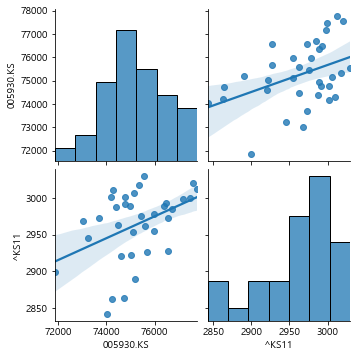

In [4]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = stock_price['Adj Close']

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [5]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = stock_price['Adj Close']['^KS11']
feature = stock_price['Adj Close']['005930.KS']

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     6.829
Date:                Wed, 24 May 2023   Prob (F-statistic):             0.0134
Time:                        15:51:38   Log-Likelihood:                -181.25
No. Observations:                  35   AIC:                             366.5
Df Residuals:                      33   BIC:                             369.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1843.4663    428.822      4.299      0.000     971.022    2715.911
005930.KS      0.0149      0.006      2.613      0.013       0.003       0.026
==============================================================================
Omnibus:                        3.989   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.386
Skew:                          -0.760   Prob(JB):                        0.184
Kurtosis:                       2.898   Cond. No.                     4.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R-squared 결정계수 구하기

R^2 = SSE/SST = 1 - (SSR/SST)

In [7]:
# y_hat 도출
target_pred1 = fitted_model.predict()

# SST(편차의 제곱, 총변동), SSE(편차와 잔차의 차이 제곱 : 회귀식으로 설명가능한 변동), SSR(잔차의 제곱 : 회귀식으로 설명하지 못하는 변동)
SST = sum((target - target.mean()) ** 2)
SSE = sum((target_pred1 - target.mean()) ** 2)
SSR = sum((fitted_model.resid) ** 2)

r_squared = (1 - (SSR/SST))

print(f'매서드로 구한 결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'직접 구한 결정계수 R-squared : {r_squared : .5f}')

매서드로 구한 결정계수 R-squared :  0.17145
직접 구한 결정계수 R-squared :  0.17145


In [8]:
# 참고 (위와 동일한 값으로 구해진다.)
sst = fitted_model.centered_tss
sse = fitted_model.ess
ssr = fitted_model.ssr

print(f'직접 구한 결정계수 R-squared : {(1 - (ssr/sst)) : .5f}')

직접 구한 결정계수 R-squared :  0.17145


In [9]:
# 참고 (상관계수의 제곱도 결정계수의 값이 나온다) 
# 하지만, 정말 극도로 예측에 실패한 경우, 결정계수는 음이 나올 수도 있다. 이를대면, SSR > SST로 도출되어 1-(SSR/SST)가 음이되는 경우이다.
# 이 경우, 상관계수의 제곱은 항상 양수가 되기에 완전히 같다고 일반화할 수는 없다. (sklearn같은 인공지능 라이브러리의 경우, 상관계수와 결정계수를 명확히 구분하고 있음) 
from scipy import stats

print(f'feature, target의 상관계수 : {stats.pearsonr(feature, target)[0] : .5f}')
print(f'feature, target의 상관계수의 제곱(= R-squared) : {(stats.pearsonr(feature, target)[0]) ** 2 : .5f}')

feature, target의 상관계수 :  0.41406
feature, target의 상관계수의 제곱(= R-squared) :  0.17145


## Adjusted R-squared 조정된 결정계수 구하기

adf R^2 = 1 - (SSR / (n - k - 1)) / (SST / (n - 1))

- n : observation 개수
- k : feature 개수

In [10]:
n = fitted_model.nobs
k = 1

adj_r_squared = 1 - (SSR / (n - k - 1)) / (SST / (n - 1)) 

print(f'매서드로 구한 조정된 결정계수 Adj R-squared : {fitted_model.rsquared_adj : .5f}')
print(f'직접 구한 조정된 결정계수 Adj R-squared : {adj_r_squared : .5f}')

매서드로 구한 조정된 결정계수 Adj R-squared :  0.14634
직접 구한 조정된 결정계수 Adj R-squared :  0.14634


## 회귀계수, 표준편차, t값

- coef / std = t

In [11]:
# 회귀계수
y = target - target.mean()
x = feature - feature.mean()

beta = sum(x * y) / sum(x **2)

print(f'매서드로 구한 회귀계수 coef \u03B2 : {fitted_model.params[1] : .5f}')
print(f'직접 구한 회귀계수 coef \u03B2 : { beta : .5f}')

매서드로 구한 회귀계수 coef β :  0.01489
직접 구한 회귀계수 coef β :  0.01489


In [12]:
# 참고 (회귀계수와 상관계수의 관계)

print(f'feature, target의 상관계수 : {stats.pearsonr(feature, target)[0] : .5f}')
print(f'상관계수 : {beta * ((sum(x ** 2) / sum(y ** 2)) ** 0.5) : .5f}')

feature, target의 상관계수 :  0.41406
상관계수 :  0.41406


In [13]:
# 회귀계수의 표준편차
var_error = sum((fitted_model.resid) ** 2) / fitted_model.df_resid
deviation_x = sum((feature - feature.mean()) ** 2)   

std_beta = (var_error/deviation_x) ** 0.5

print(f'매서드로 구한 회귀계수의 표준편차 se(\u03B2) : {fitted_model.cov_params()["005930.KS"][1] ** 0.5 : .5f}')
print(f'직접 구한 회귀계수의 표준편차 se(\u03B2) : { std_beta : .5f}')

매서드로 구한 회귀계수의 표준편차 se(β) :  0.00570
직접 구한 회귀계수의 표준편차 se(β) :  0.00570


In [14]:
# 회귀계수의 t값
t_beta = beta/std_beta

print(f'매서드로 구한 회귀계수(\u03B2)의 t값 : {fitted_model.tvalues[1] : .5f}')
print(f'직접 구한 회귀계수(\u03B2)의 t값 : { t_beta : .5f}')

매서드로 구한 회귀계수(β)의 t값 :  2.61314
직접 구한 회귀계수(β)의 t값 :  2.61314


## 기각역 p-value 시각화

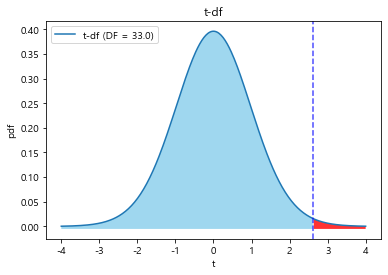

In [15]:
# 라이브러리 호출
import math
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-4, 4, 300)

# 자유도 설정 
DF = fitted_model.nobs - 2
y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

plt.plot(t, y)                       
plt.xlabel("t")                    
plt.ylabel("pdf")                      
plt.title("t-df")
plt.legend([f"t-df (DF = {DF})"])
plt.axvline(t_beta, linestyle='--', color='blue', alpha=.7)
plt.fill_between(t, -.005, y, where=(t >= -5) & (t <= t_beta), facecolor='skyblue', alpha=.8,)  # 기각역이 좀 더 명확히 표시되기 위해 실제 크기보다 조금 더 키움
plt.fill_between(t, -.005, y, where=(t >= t_beta), facecolor='red', alpha=.8,)
plt.show()


## 회귀식 시각화

결정계수 R-squared :  0.17145
constant coef(계수)에 대한 p 값 :  0.00014
feature coef(계수)에 대한 p 값 :  0.01341
잔차의 제곱합 MSE :  1954.64596


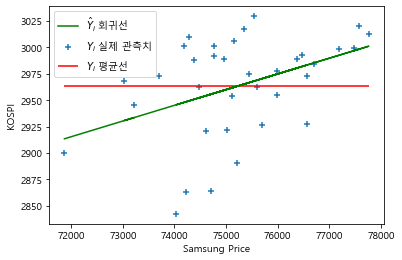

In [16]:
# 통계치 출력 
print(f'결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef(계수)에 대한 p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'잔차의 제곱합 MSE : {fitted_model.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = fitted_model.predict()

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred1, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

# Sklearn 라이브러리

In [17]:
# sklearn을 활용한 선형회귀선 도출
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(feature_add, target)

target_pred2 = model2.predict(feature_add)


결정계수 R-squared :  0.17145
constant coef(계수):  1843.46633
feature coef(계수) :  0.01489


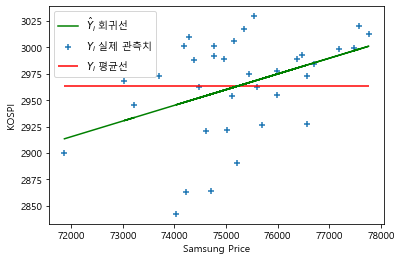

In [18]:
print(f'결정계수 R-squared : {model2.score(feature_add, target) : .5f}')
print(f'constant coef(계수): {model2.intercept_ : .5f}')
print(f'feature coef(계수) : {model2.coef_[1] : .5f}')

# 시각화
plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred2, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

# Scipy 라이브러리

In [19]:
from scipy.stats import linregress

model = linregress(feature, target)

print(f"R-squared : {model.rvalue ** 2 : .5f}")
print(f'constant coef(계수) : {model.intercept : .5f}')
print(f'feature coef(계수) : {model.slope : .5f}')
print(f'feature coef(계수)의 p-value : {model.pvalue : .5f}')

R-squared :  0.17145
constant coef(계수) :  1843.46633
feature coef(계수) :  0.01489
feature coef(계수)의 p-value :  0.01341


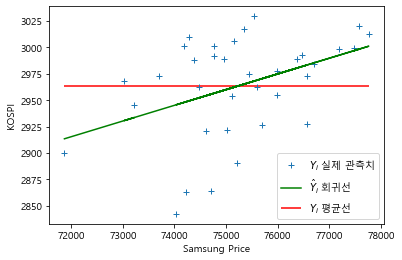

In [20]:
# 시각화
plt.plot(feature, target, '+', label='$Y_i$ 실제 관측치')
plt.plot(feature, model.intercept + model.slope * feature, 'g', label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(), feature.min(), feature.max(), color = 'r', label='$Y_i$ 평균선')
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.legend()
plt.show()